<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/%EC%A0%84%EA%B7%B9%EB%AA%A8%EC%82%AC(MWCNT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LFP 배치 위치: (5.48, 9.82), 반지름: 2.46, 기공률: 80.06%
LFP 배치 위치: (7.02, 2.10), 반지름: 2.14, 기공률: 64.90%
LFP 배치 위치: (-0.04, 2.48), 반지름: 2.47, 기공률: 44.77%
LFP 배치 위치: (0.75, 7.38), 반지름: 2.03, 기공률: 31.18%
LFP 배치 위치: (3.73, 0.20), 반지름: 1.40, 기공률: 24.74%
LFP 배치 위치: (9.16, 6.81), 반지름: 1.40, 기공률: 18.23%
LFP 배치 위치: (6.15, 5.75), 반지름: 1.31, 기공률: 12.84%
LFP 배치 위치: (3.71, 4.32), 반지름: 1.30, 기공률: 7.53%
Final porosity: 7.53%


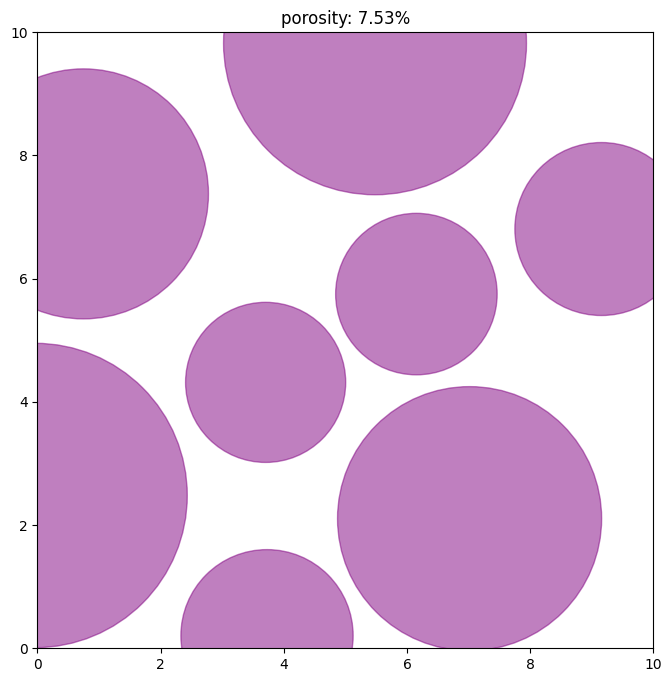

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi
import random

# 랜덤 시드 고정
np.random.seed(4)

# 원의 면적 계산 함수 (잘린 원을 포함한 계산)
def circle_rect_area(x, y, r, domain_size):
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05

# LFP 배치 함수
def increase_radius_to_target_porosity(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts=10000):
    lfp_positions = []
    total_area = domain_size ** 2
    max_occupied_area = total_area * (1 - target_porosity)
    occupied_area = 0
    attempts = 0

    while occupied_area < max_occupied_area and attempts < max_attempts:
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        x = np.random.uniform(-0.1, domain_size + 0.1)
        y = np.random.uniform(-0.1, domain_size + 0.1)

        overlap = False
        for lx, ly, lr in lfp_positions:
            dist = np.hypot(x - lx, y - ly)
            if dist < (r_LFP + lr) * 1.05:
                overlap = True
                break

        if not overlap:
            lfp_positions.append((x, y, r_LFP))
            occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
            print(f"LFP 배치 위치: ({x:.2f}, {y:.2f}), 반지름: {r_LFP:.2f}, 기공률: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    while occupied_area < max_occupied_area and attempts < max_attempts:
        lfp_positions.sort(key=lambda x: x[2])

        for i in range(len(lfp_positions)):
            lx, ly, lr = lfp_positions[i]
            if lr < max_r_LFP:
                new_lr = lr + 0.07
                overlap = False
                for j in range(len(lfp_positions)):
                    if i != j:
                        lpx, lpy, lpr = lfp_positions[j]
                        dist = np.hypot(lx - lpx, ly - lpy)
                        if dist < (new_lr + lpr) * 1.05:
                            overlap = True
                            break

                if not overlap:
                    lfp_positions[i] = (lx, ly, new_lr)
                    occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
                    print(f"LFP 배치 위치: ({lx:.2f}, {ly:.2f}), 반지름: {new_lr:.2f}, 기공률: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    occupied_area = sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions)
    porosity = 1 - occupied_area / total_area
    print(f"Final porosity: {porosity:.2%}")

    return lfp_positions

# 예시 사용
domain_size = 10
target_porosity = 0.1
lfp_positions = increase_radius_to_target_porosity(domain_size, target_porosity=target_porosity)

# 시각화
plt.figure(figsize=(8, 8))
for (lx, ly, lr) in lfp_positions:
    circle = patches.Circle((lx, ly), lr, color='purple', alpha=0.5)
    plt.gca().add_artist(circle)
plt.xlim(0, domain_size)
plt.ylim(0, domain_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"porosity: {1 - sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions) / (domain_size ** 2):.2%}")
plt.show()


MWCNT 배치 완료: 2013개, 총 길이: 400.10 μm


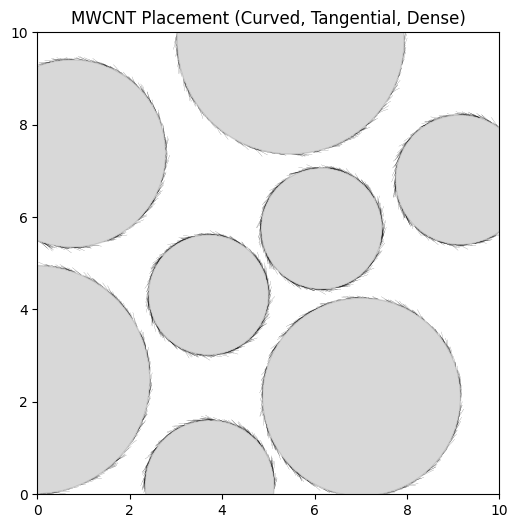

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)

# 1. 곡선 생성 함수 (곡률 점진 감소 반영)
def generate_mwcnt_curve(start_x, start_y, length, init_angle=None, max_delta_theta_deg=15, segment_len=0.05):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]

    angle = init_angle if init_angle is not None else np.random.uniform(0, 2 * np.pi)

    for i in range(n_segments):
        progress_ratio = i / n_segments
        delta_theta_deg = max_delta_theta_deg * (1 - progress_ratio)  # 점점 줄어드는 곡률
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))

        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 2. MWCNT 배치 함수
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000000):
    mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle_surface = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.002, 0.01)  # 더 가까이

        x0 = lx + (lr + distance_from_edge) * np.cos(angle_surface)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle_surface)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        tangent_angle = angle_surface + np.pi / 2

        length = np.random.uniform(0.1, 0.3)  # 짧은 길이 다수 배치 전략
        path = generate_mwcnt_curve(x0, y0, length, init_angle=tangent_angle)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.002:  # 매우 밀접 허용
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"MWCNT 배치 완료: {len(mwcnt_paths)}개, 총 길이: {total_length:.2f} μm")
    return mwcnt_paths

# 3. 시각화 함수
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement (Curved, Tangential, Dense)")
    plt.show()

# 4. 실행
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=400.0)  # 더 많은 길이
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)


✅ MWCNT 배치 완료: 3745개, 총 길이: 150.01 μm


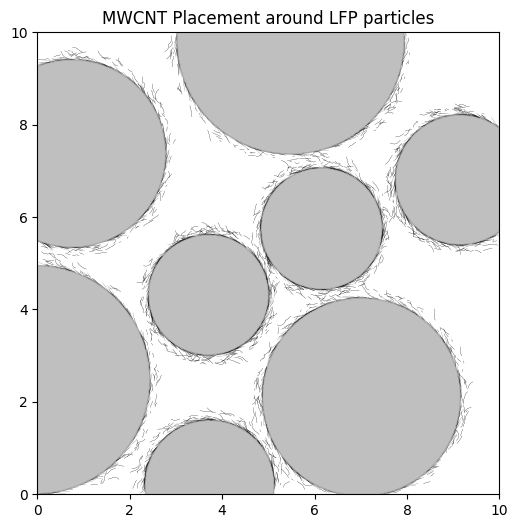

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(6)


# 2. 곡선 생성 함수 (초기 각도 입력 가능)
def generate_mwcnt_curve(start_x, start_y, length, delta_theta_deg=30, segment_len=0.05, init_angle=None):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]

    angle = init_angle if init_angle is not None else np.random.uniform(0, 2 * np.pi)

    for i in range(n_segments):
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))
        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 3. MWCNT 배치 함수 (접선 방향 시작)
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000):
    #mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.01, 0.2)
        x0 = lx + (lr + distance_from_edge) * np.cos(angle)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        length = np.random.uniform(0.05, 0.3)
        tangent_angle = angle + np.pi / 2

        path = generate_mwcnt_curve(x0, y0, length, delta_theta_deg=30, init_angle=tangent_angle)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.01:
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"✅ MWCNT 배치 완료: {len(mwcnt_paths)}개, 총 길이: {total_length:.2f} μm")
    return mwcnt_paths

# 4. 시각화 함수
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.5)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP particles")
    plt.show()

# 5. 전체 실행
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=150.0)
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)



In [ ]:
def place_mwcnts_between_lfp_pairs_safe(domain_size, lfp_positions, num_lines=1, length=0.3, buffer=0.05):
    import itertools
    mwcnt_paths = []

    for (x1, y1, r1), (x2, y2, r2) in itertools.combinations(lfp_positions, 2):
        dx, dy = x2 - x1, y2 - y1
        dist = np.hypot(dx, dy)

        if dist < r1 + r2 + buffer * 2:
            continue  # 입자끼리 너무 가까워서 MWCNT 넣을 틈이 없음

        # 중심 방향 벡터 및 수직 벡터
        ux, uy = dx / dist, dy / dist
        tx, ty = -uy, ux  # 접선 방향 단위벡터

        # 시작점: 입자 표면에서 buffer 만큼 떨어진 지점
        offset_from_p1 = r1 + buffer + 0.1 * np.random.rand()
        offset_from_p2 = r2 + buffer + 0.1 * np.random.rand()
        mid_x = x1 + ux * offset_from_p1 + (x2 - x1 - ux * (offset_from_p1 + offset_from_p2)) / 2
        mid_y = y1 + uy * offset_from_p1 + (y2 - y1 - uy * (offset_from_p1 + offset_from_p2)) / 2

        for i in range(num_lines):
            lateral_shift = (i - num_lines // 2) * 0.05
            sx = mid_x + lateral_shift * tx
            sy = mid_y + lateral_shift * ty

            init_angle = np.arctan2(ty, tx)
            path = generate_mwcnt_curve(sx, sy, length, delta_theta_deg=20, init_angle=init_angle)

            # 도메인 밖 또는 LFP와 충돌 검사
            if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
                continue

            overlapped = False
            for px, py in path:
                for ox, oy, orad in lfp_positions:
                    if np.hypot(px - ox, py - oy) < orad + buffer:
                        overlapped = True
                        break
                if overlapped:
                    break
            if not overlapped:
                mwcnt_paths.append(path)

    print(f"🔗 안전하게 배치된 LFP 사이 MWCNT 수: {len(mwcnt_paths)}")
    return mwcnt_paths


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

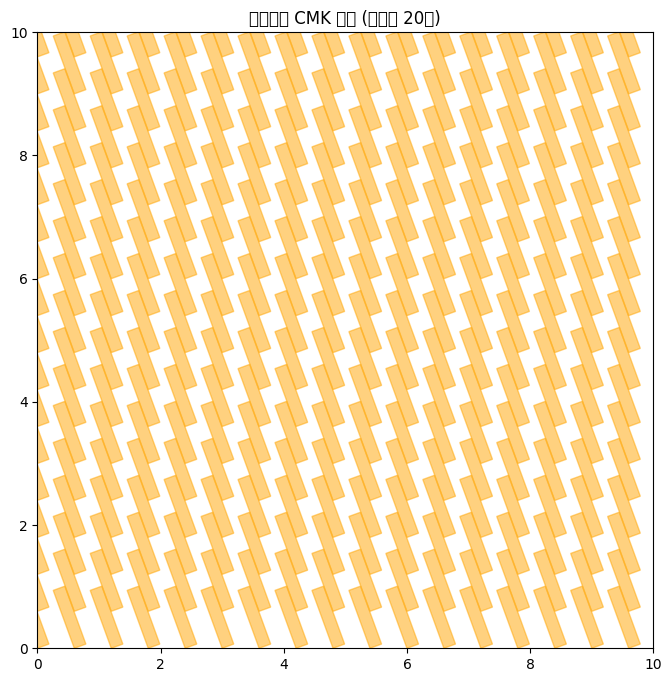

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 도메인 크기
domain_size = 10.0

# CMK 파라미터
cmk_width = 0.2         # 구멍 너비
cmk_height = 1.0        # 구멍 길이
x_spacing = 0.6         # 가로 간격
y_spacing = 0.6         # 세로 간격
cmk_angle = 20          # 기울기 (degree)

# CMK 배치 함수
def place_slanted_cmk(domain_size, cmk_width, cmk_height, x_spacing, y_spacing, angle_deg):
    cmk_rects = []
    angle_rad = np.deg2rad(angle_deg)

    x_positions = np.arange(0, domain_size, x_spacing)
    y_positions = np.arange(0, domain_size, y_spacing)

    for x in x_positions:
        for y in y_positions:
            rect = patches.Rectangle(
                (x, y),
                cmk_width,
                cmk_height,
                angle=angle_deg,
                color='orange',
                alpha=0.5
            )
            cmk_rects.append(rect)
    return cmk_rects

# 그리기
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_aspect('equal')

# CMK 구조 배치 및 추가
cmk_rects = place_slanted_cmk(domain_size, cmk_width, cmk_height, x_spacing, y_spacing, cmk_angle)
for rect in cmk_rects:
    ax.add_patch(rect)

plt.title(f"기울어진 CMK 구조 (기울기 {cmk_angle}도)")
plt.show()


MWCNT 배치 완료: 4156개, 총 길이: 200.54 μm


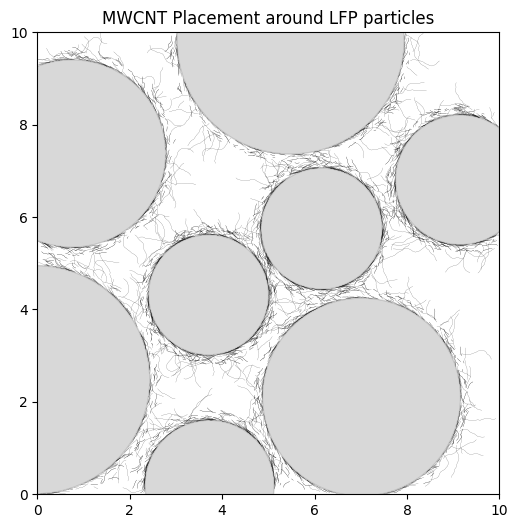

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
# 2. 곡선 생성 함수
def generate_mwcnt_curve(start_x, start_y, length, delta_theta_deg=30, segment_len=0.05):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]
    angle = np.random.uniform(0, 2 * np.pi)

    for _ in range(n_segments):
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))
        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 3. MWCNT 배치 함수
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000000):
    #mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.01, 0.2)
        x0 = lx + (lr + distance_from_edge) * np.cos(angle)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        length = np.random.uniform(0.1, 0.9)
        path = generate_mwcnt_curve(x0, y0, length)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.01:
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"MWCNT 배치 완료: {len(mwcnt_paths)}개, 총 길이: {total_length:.2f} μm")
    return mwcnt_paths

# 4. 시각화 함수
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP particles")
    plt.show()


# 5. 전체 실행
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=200.0)
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)


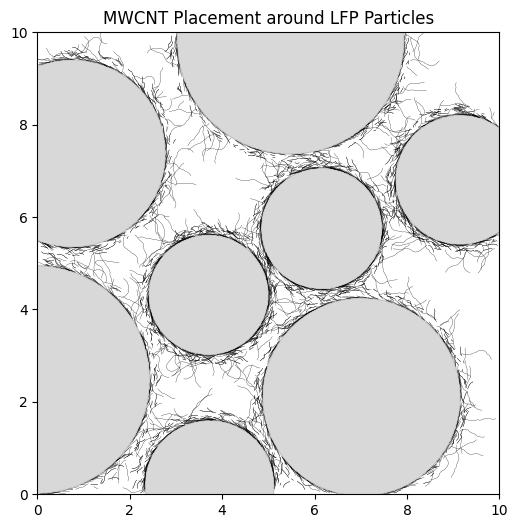

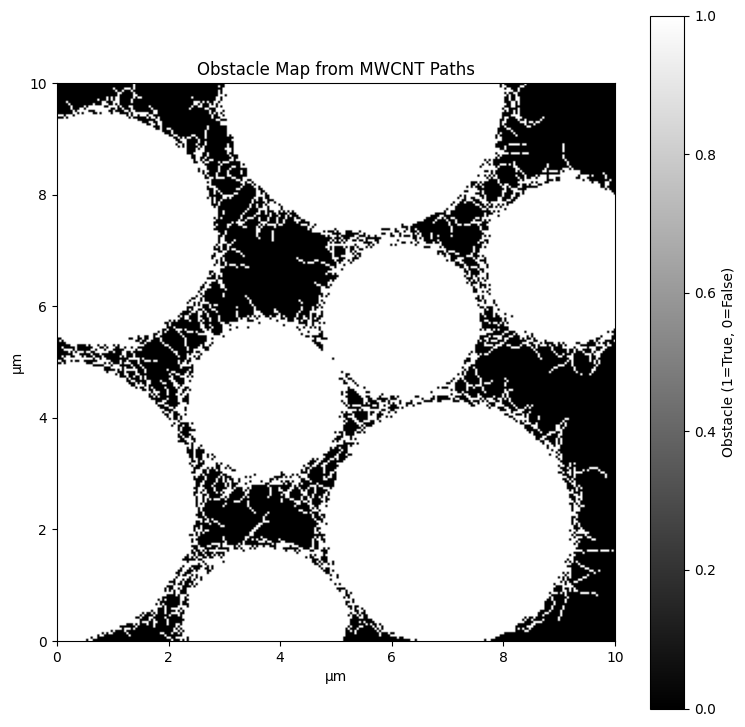

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)



# 4. 장애물 맵 업데이트 함수
def update_obstacle_map(mwcnt_paths, obstacle_map, resolution):
    for path in mwcnt_paths:
        for x, y in path:
            i = int(y / resolution)
            j = int(x / resolution)
            if 0 <= i < obstacle_map.shape[0] and 0 <= j < obstacle_map.shape[1]:
                obstacle_map[i, j] = 1

# 5. MWCNT + LFP 시각화
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)
    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.2)
    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP Particles")
    plt.show()

def add_lfp_to_obstacle_map(lfp_positions, obstacle_map, resolution):
    for x, y, r in lfp_positions:
        i_center = int(y / resolution)
        j_center = int(x / resolution)
        r_grid = int(r / resolution)
        for di in range(-r_grid, r_grid + 1):
            for dj in range(-r_grid, r_grid + 1):
                ii = i_center + di
                jj = j_center + dj
                if 0 <= ii < obstacle_map.shape[0] and 0 <= jj < obstacle_map.shape[1]:
                    dy = (ii + 0.5) * resolution - y
                    dx = (jj + 0.5) * resolution - x
                    if dx**2 + dy**2 <= r**2:
                        obstacle_map[ii, jj] = 1


# 6. 장애물 맵 시각화
def plot_obstacle_map(obstacle_map, domain_size):
    plt.figure(figsize=(9, 9))
    plt.imshow(obstacle_map, cmap='gray', origin='lower', extent=[0, domain_size, 0, domain_size])
    plt.title("Obstacle Map from MWCNT Paths")
    plt.xlabel("μm")
    plt.ylabel("μm")
    plt.colorbar(label="Obstacle (1=True, 0=False)")
    plt.show()

# 7. 전체 실행
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5
    resolution = 0.04




    # 시각화
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)

    # 장애물 맵 생성
    grid_size = int(domain_size / resolution)
    obstacle_map = np.zeros((grid_size, grid_size), dtype=np.uint8)
    update_obstacle_map(mwcnt_paths, obstacle_map, resolution)
    add_lfp_to_obstacle_map(lfp_positions, obstacle_map, resolution)

    # 장애물 맵 시각화
    plot_obstacle_map(obstacle_map, domain_size)


In [ ]:
import numpy as np

# 장애물이 없는 곳의 인덱스를 찾기
free_space = np.where(obstacle_map == 0)

# free_space는 x, y 인덱스 배열로 반환됩니다
x_free, y_free = free_space

# 이제 x_free, y_free는 리튬이온이 출발할 수 있는 (x, y) 좌표를 나타냅니다.
def calculate_porosity(map_array):
    # 0의 개수 (비어 있는 공간)
    empty_space = np.sum(map_array == 0)
    # 총 원소 개수
    total_space = map_array.size
    # 기공률 = 비어 있는 공간 / 총 공간
    porosity = empty_space / total_space
    return porosity

# 기공률 출력
porosity = calculate_porosity(obstacle_map)
print(f"기공률: {porosity}")

기공률: 0.291696


(250, 250)


<ipython-input-119-001fdb5ee46a>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


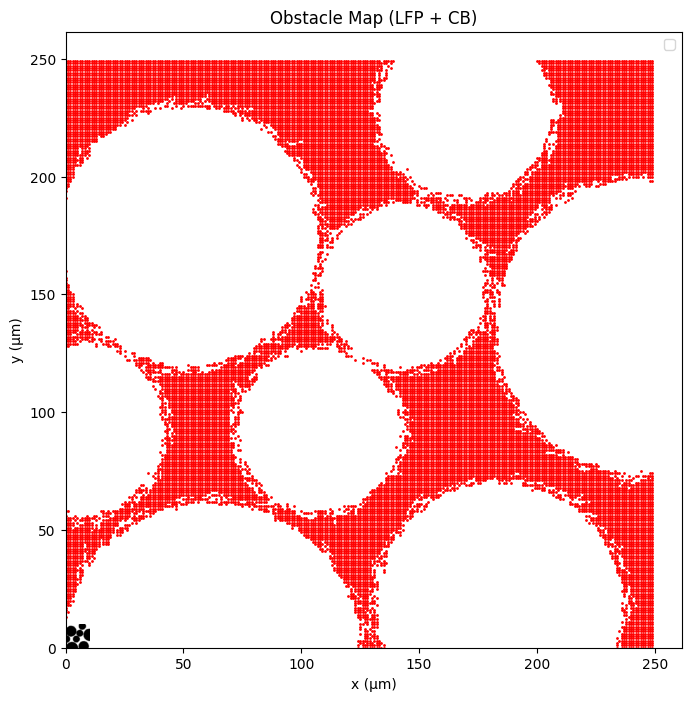

In [ ]:
domain_size = 10
print(obstacle_map.shape)
plt.figure(figsize=(8, 8))
plt.imshow(obstacle_map.T, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
plt.title("Obstacle Map (LFP + CB)")
plt.xlabel("x (μm)")
plt.ylabel("y (μm)")

#유효한 경계 점 그리기
plt.scatter(x_free, y_free, color='red', s=1)

plt.legend()
plt.grid(False)
plt.show()

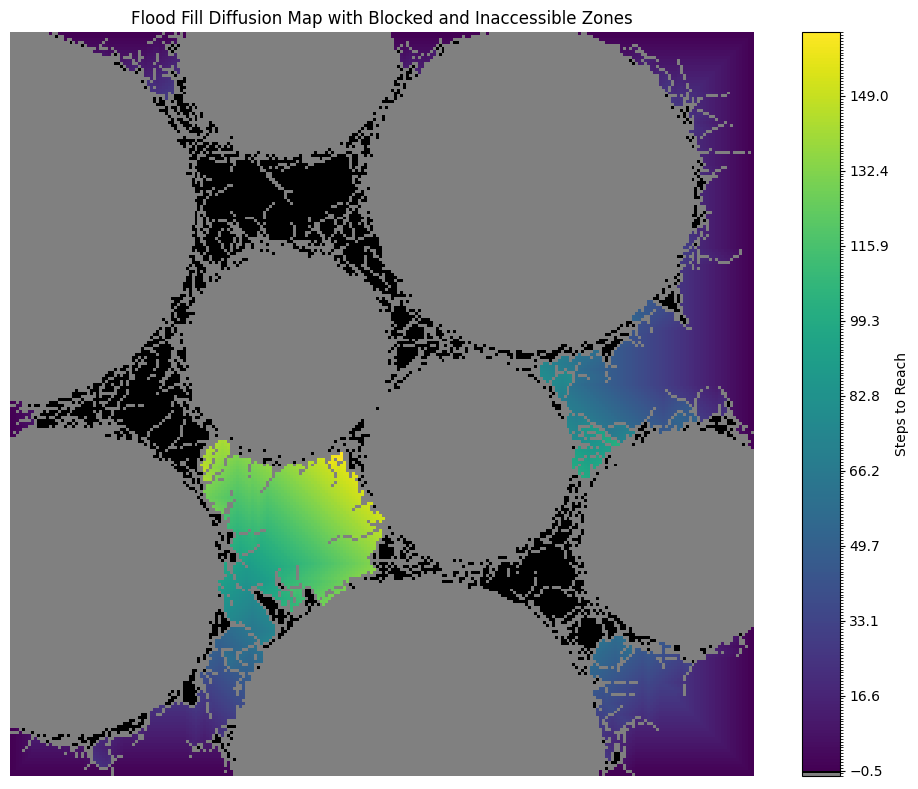

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.colors import ListedColormap, BoundaryNorm

# Flood Fill 알고리즘
def flood_fill_time_map(obstacle_map, start_points):
    h, w = obstacle_map.shape
    time_map = np.full((h, w), np.inf)
    visited = np.zeros((h, w), dtype=bool)
    queue = deque()

    for y, x in start_points:
        if obstacle_map[y, x] == 0:
            queue.append((y, x, 0))
            time_map[y, x] = 0
            visited[y, x] = True

    while queue:
        y, x, t = queue.popleft()
        for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < h and 0 <= nx < w:
                if not visited[ny, nx] and obstacle_map[ny, nx] == 0:
                    visited[ny, nx] = True
                    time_map[ny, nx] = t + 1
                    queue.append((ny, nx, t + 1))
    return time_map

# 가장자리에서 시작점 찾기
def get_edge_starts(obstacle_map):
    starts = []
    h, w = obstacle_map.shape
    for i in range(h):
        if obstacle_map[i, 0] == 0:
            starts.append((i, 0))
        if obstacle_map[i, w-1] == 0:
            starts.append((i, w-1))
    for j in range(w):
        if obstacle_map[0, j] == 0:
            starts.append((0, j))
        if obstacle_map[h-1, j] == 0:
            starts.append((h-1, j))
    return starts

# Flood Fill 실행
start_points = get_edge_starts(obstacle_map)
time_map = flood_fill_time_map(obstacle_map, start_points)

# 시각화용 맵 생성
visual_map = np.zeros_like(time_map)
visual_map[~np.isinf(time_map)] = time_map[~np.isinf(time_map)]                  # 도달 가능
visual_map[(np.isinf(time_map)) & (obstacle_map == 0)] = -1                      # 빈 공간이지만 도달 못함
visual_map[obstacle_map == 1] = -2                                               # 입자

# 색상 정의
cmap_colors = [
    'grey',          # -2: 입자
    'black',      # -1: 도달 못한 빈 공간
    *plt.cm.viridis(np.linspace(0, 1, 256))  # 나머지 퍼짐 경로
]
cmap = ListedColormap(cmap_colors)

# 범위 및 색상 정규화
max_time = np.nanmax(time_map[~np.isinf(time_map)])
bounds = [-2.5, -1.5, -0.5] + list(np.linspace(0, max_time, 257)[1:])
norm = BoundaryNorm(bounds, cmap.N)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(visual_map, cmap=cmap, norm=norm, interpolation='nearest')
plt.title("Flood Fill Diffusion Map with Blocked and Inaccessible Zones")
plt.colorbar(label='Steps to Reach')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# 전해질이 존재하는 영역 (입자가 없는 부분)
electrolyte_mask = (obstacle_map == 0)

# 그 중 도달 가능한 영역
reachable_mask = (~np.isinf(time_map)) & electrolyte_mask

# 도달 가능 비율 계산
total_electrolyte_voxels = np.sum(electrolyte_mask)
reachable_voxels = np.sum(reachable_mask)
reachable_ratio = reachable_voxels / total_electrolyte_voxels * 100

# 평균 도달 시간과 표준편차 (도달 가능한 전해질 영역만)
average_steps = np.mean(time_map[reachable_mask])
std_steps = np.std(time_map[reachable_mask])

# 결과 출력
print("🔍 정확한 통계 분석 결과 (전해질 영역 기준)")
print(f"1. 전해질 영역 도달 가능 비율: {reachable_ratio:.2f}%")
print(f"2. 평균 도달 시간: {average_steps:.2f} steps")
print(f"3. 도달 시간 표준편차: {std_steps:.2f} steps")


🔍 정확한 통계 분석 결과 (전해질 영역 기준)
1. 전해질 영역 도달 가능 비율: 68.54%
2. 평균 도달 시간: 40.54 steps
3. 도달 시간 표준편차: 45.27 steps
